#**Loading Modules and imports**


In [1]:
#imports
import numpy as np
import pandas as pd
import os
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set()

# **Loading, visualizing and verifying the dataset**

In [2]:
#load the dataset
df = pd.read_csv('kidney_disease.csv')

#visualize the first 20 rows & 26 columns
df.head(n=20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
#check the shape of the dataset
df.shape

(400, 26)

In [4]:
#find null values in the dataset
df.isnull().sum() #gives null values per column

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

#**Imputing the null values**

In [5]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #NaN values would be replaced by the mode of the column, can be replaced with mean or median for numerical columns and most frequent for textual columns

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df_imputed.isnull().sum() #confirming that there are no more null values in the dataset

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [7]:
#finding the unique values in the dataset
#looping through column names
for i in df_imputed.columns:
  print("-----------------------------", i, "-----------------------------")
  print()
  print(set(df_imputed[i].tolist())) #converting column to a list
  print()

#gets all the errors in the dataset that have to be rectified

----------------------------- id -----------------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

In [8]:
print(df_imputed["rc"].mode()) #prints the mode of rc
print(df_imputed["wc"].mode()) #prints the mode of wc
print(df_imputed["pcv"].mode()) #prints the mode of pcv


0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


#**Cleaning the dataset and removing all the wrong or mistyped values**

In [9]:
#replacing all the mistaken values with the actual values

#replacing wrong values in classification column
df_imputed["classification"]=df_imputed["classification"].apply(lambda x: 'ckd' if x=="ckd\t" else x)

#replacing wrong values in cad column
df_imputed["cad"]=df_imputed["cad"].apply(lambda x: 'no' if x=="\tno" else x)

#replacing wrong values in dm column
df_imputed["dm"]=df_imputed["dm"].apply(lambda x: 'no' if x=="\tno" else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes" else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==" yes" else x)

#replacing wrong values in rc column
df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=="\t?" else x)

#replacing wrong values in wc column
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=="\t8400" else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=="\t6200" else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=="\?" else x)

#replacing the wrong values in pcv column
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=="\t43" else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=="\t?" else x)



In [10]:
#confirming the cleaning process

for i in df_imputed.columns:
  print("-----------------------------", i, "-----------------------------")
  print()
  print(set(df_imputed[i].tolist())) #converting column to a list
  print()



----------------------------- id -----------------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

In [11]:
df_imputed.head(n=400) #visualizing the dataset to double check the cleaning process

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


#**Checking for label imbalance**

In [12]:
temp=df_imputed["classification"].value_counts() #getting the number of times checked and not checked have appeared
temp #displaying the value

classification
ckd       250
notckd    150
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


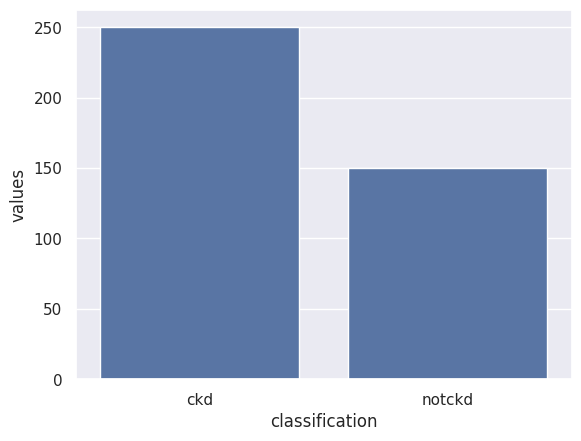

In [13]:
temp_df=pd.DataFrame({'classification':temp.index, 'values':temp.values}) #extracting the classifications and the values to enable a plot
print(sns.barplot(x='classification', y='values',data=temp_df)) #using seaborn to produce barplot of classifation vs their values to check for label imbalance

From the barplot we can see that there are way too many checked values (ckd) compared to the not checked values (notckd) indicating a label imbalance.

In [14]:
df.dtypes #displaying the original dataypes of the columns


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

As we can see above, the imputer has converted all the columns into the object datatype.

In [16]:
for i in df.select_dtypes(exclude=["object"]).columns:
  df_imputed[i]=df_imputed[i].apply(lambda x:float(x)) #converting numberical values to float

df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

#**Plotting and visualizing the dataset**

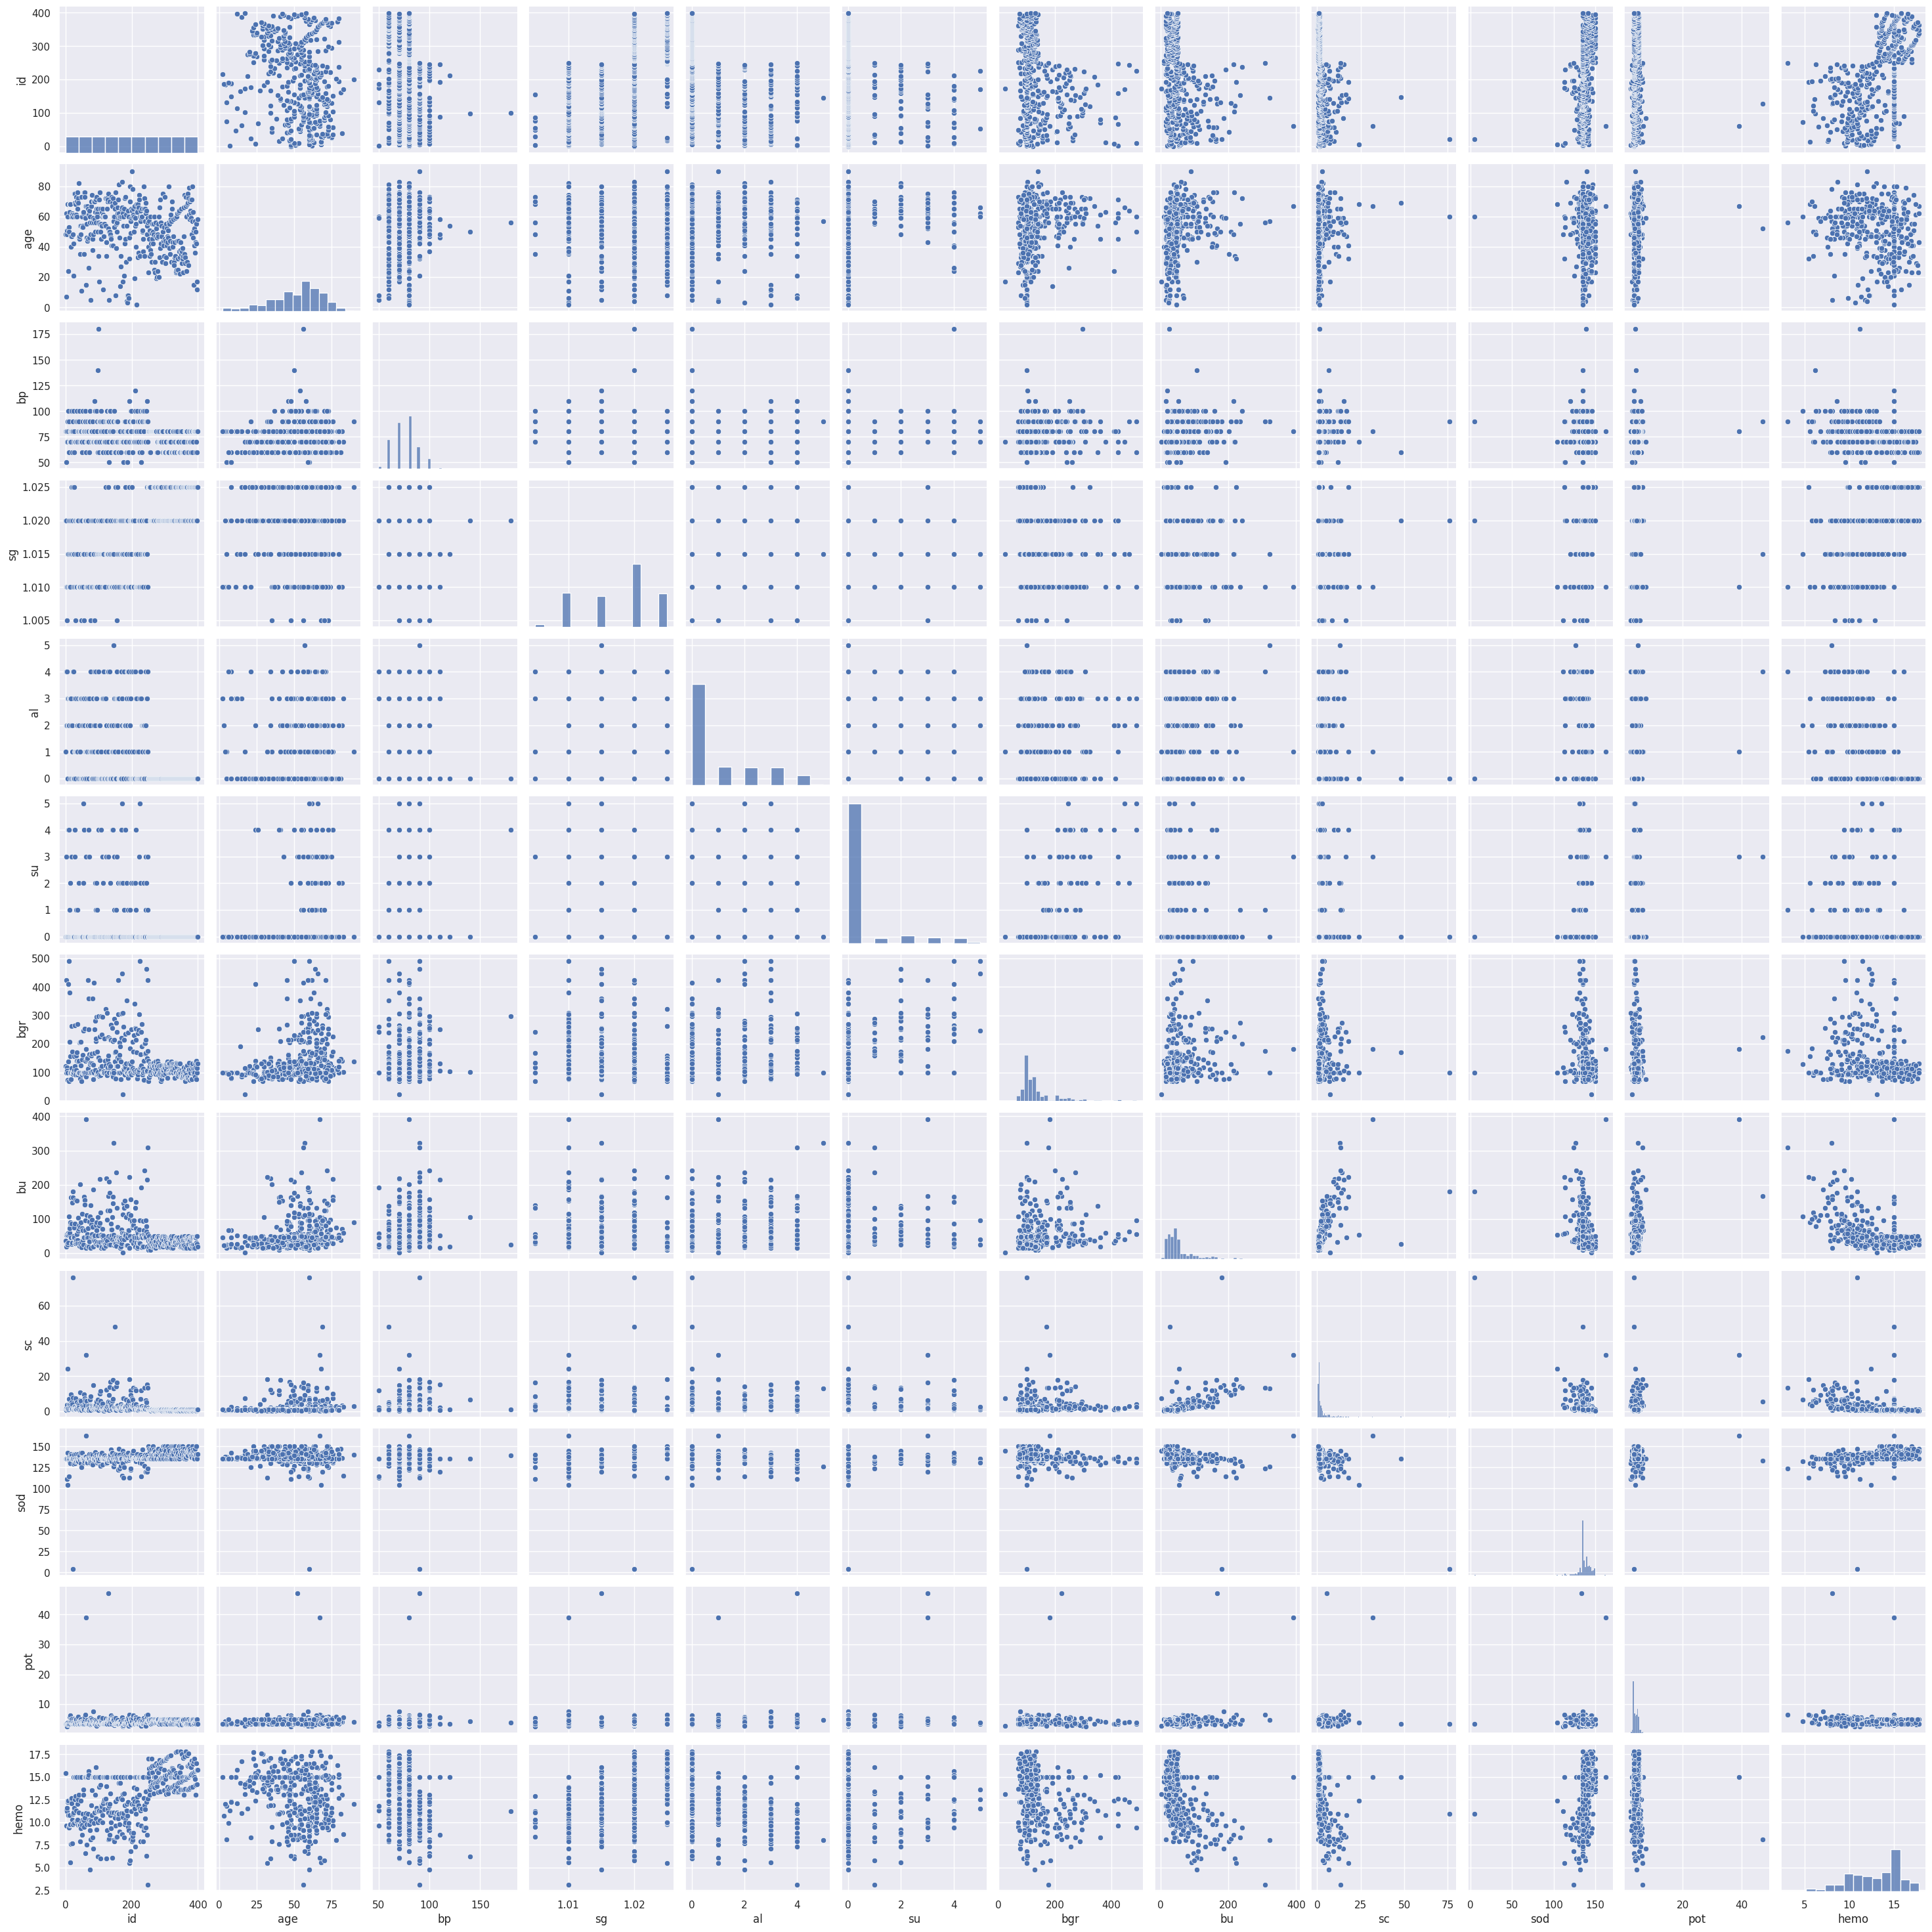

In [27]:
sns.pairplot(df_imputed)

Scatter plots refer to numerical data and (almost) straight line plots refer to categorical data.

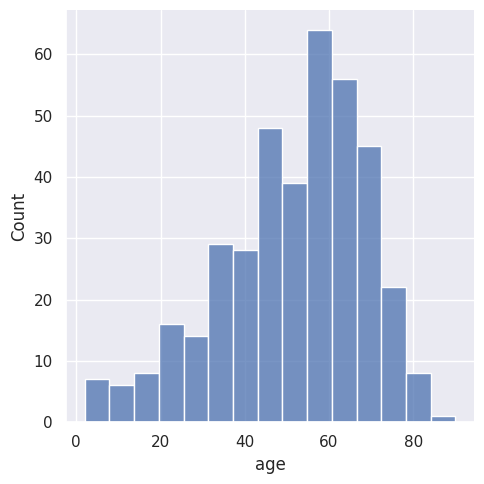

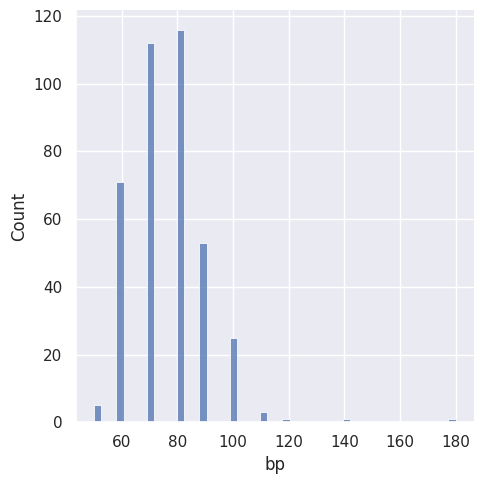

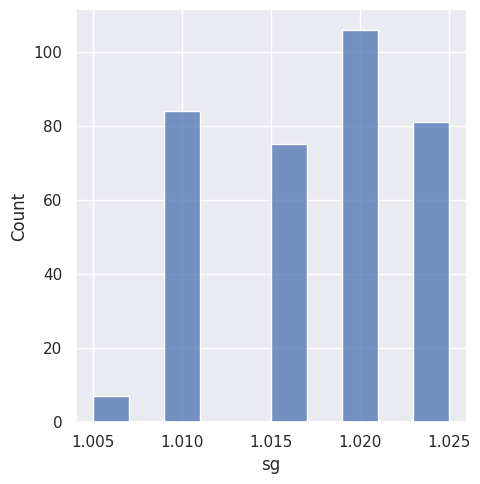

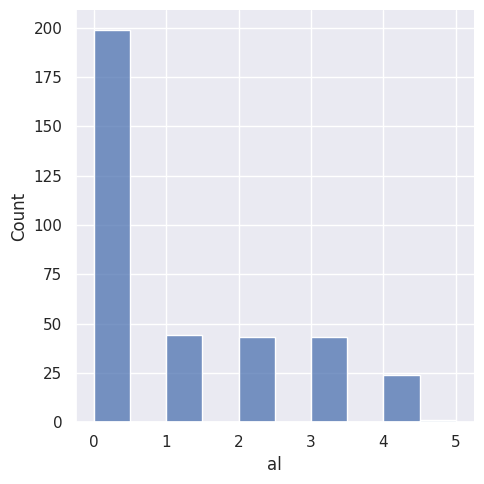

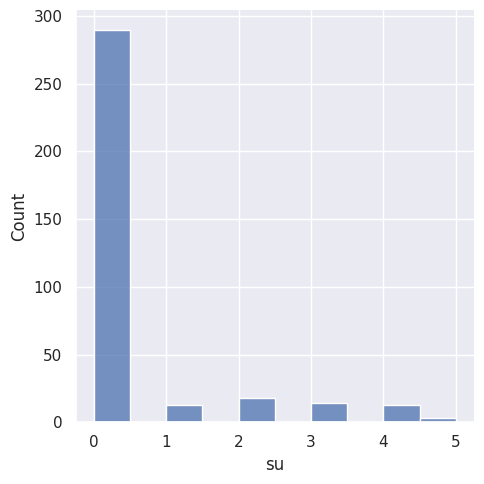

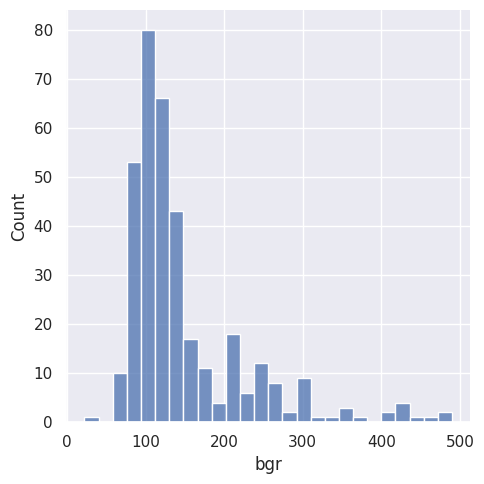

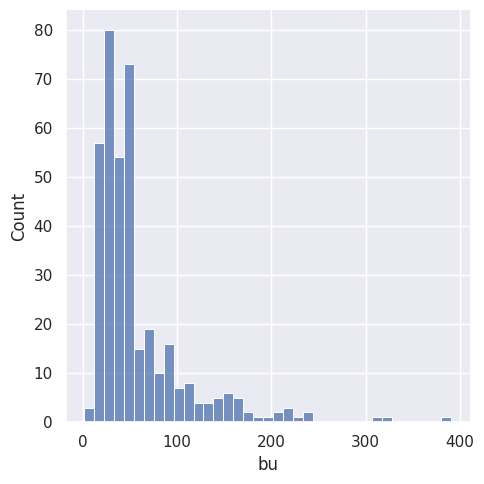

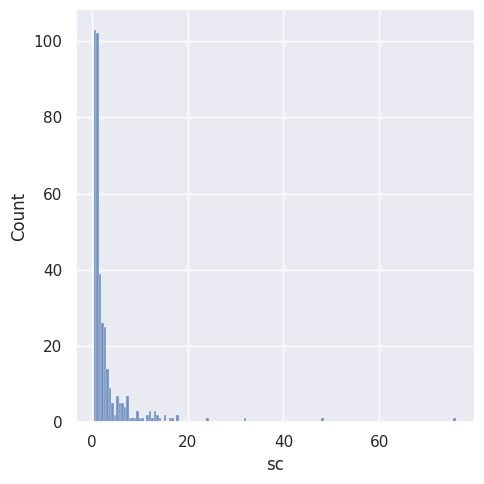

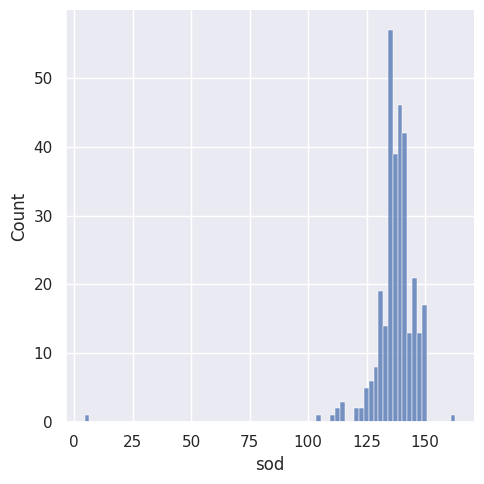

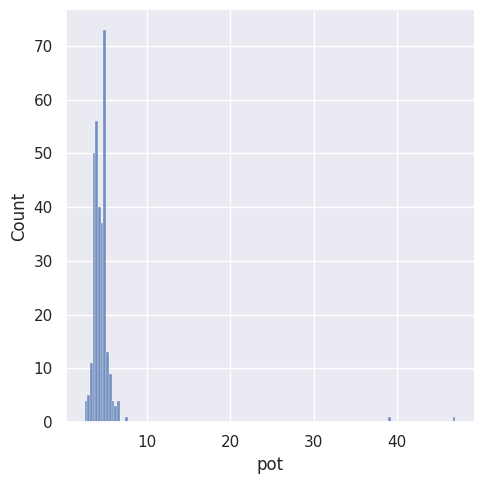

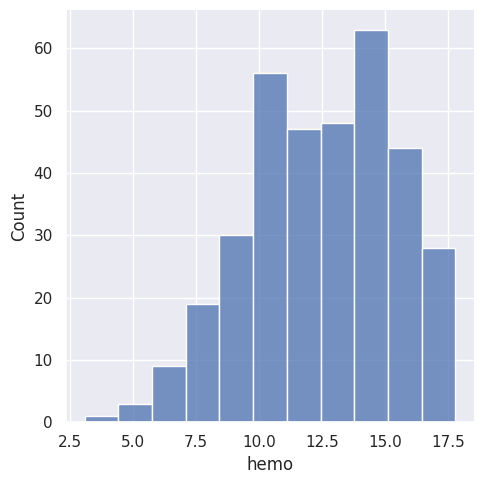

In [17]:
#finding the distribution of all the numerical columns in the data

import matplotlib.pyplot as plt

def displot(col):
  sns.displot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
  displot(i)


All the numerical columns in the dataset have been plotted.

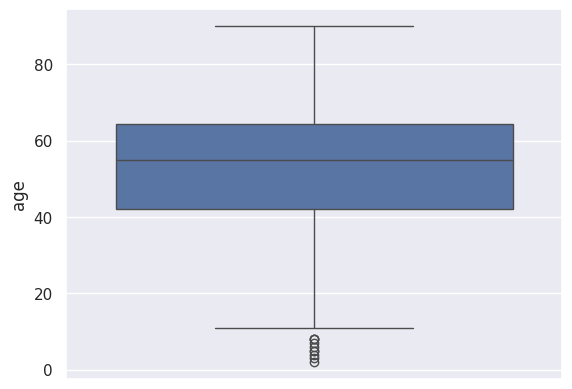

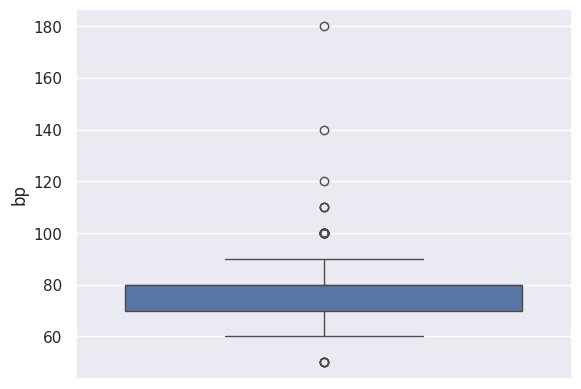

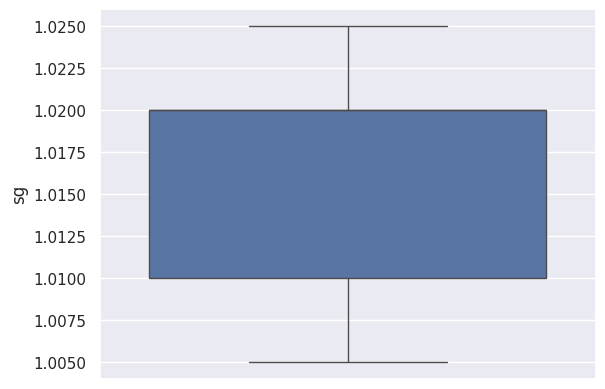

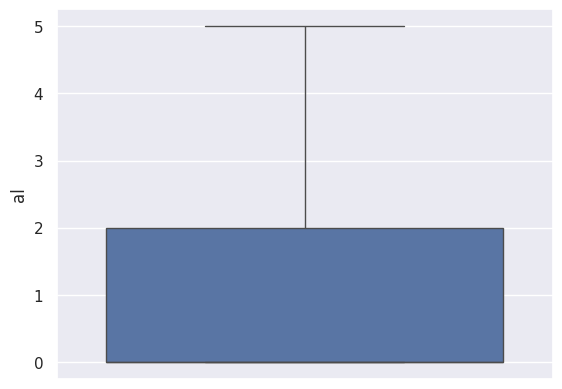

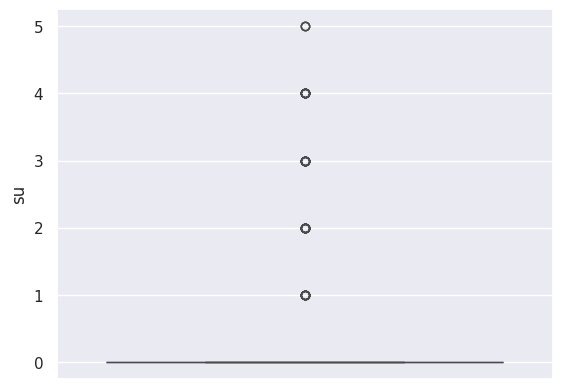

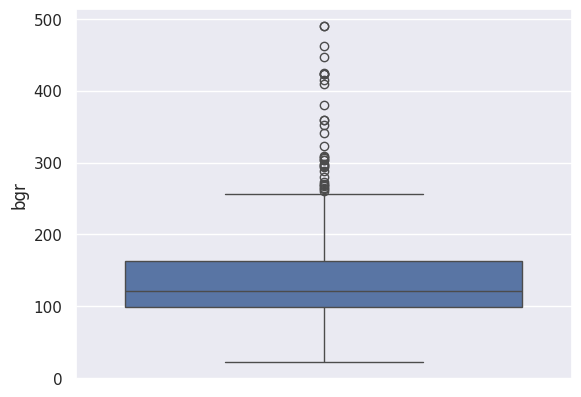

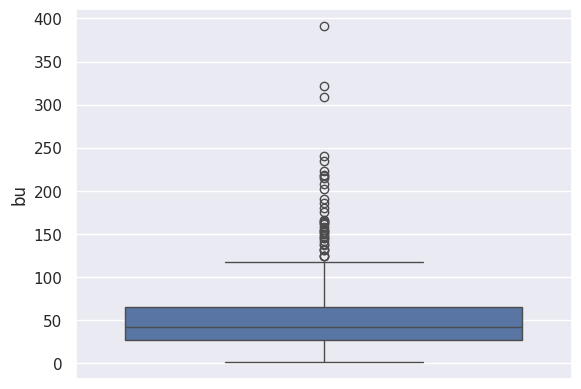

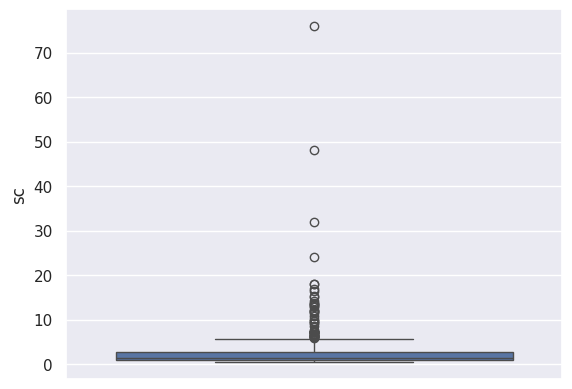

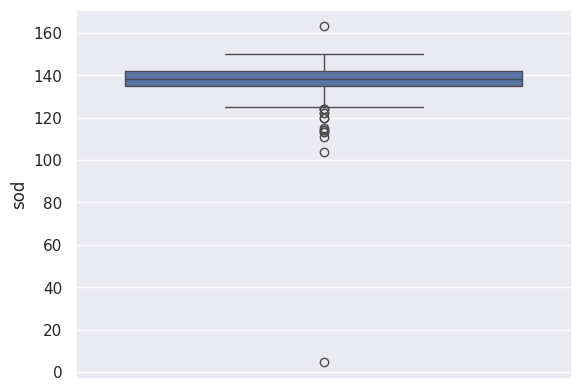

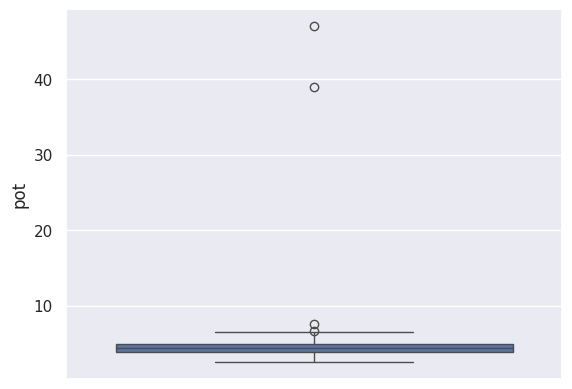

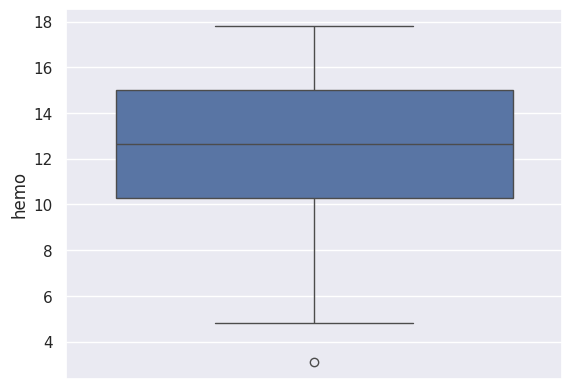

In [18]:
#finding and removing outlier data

def boxplots(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)

#**Encoding the data (Last step in pre-processing)**

In [19]:
#labeling encoding to convert the categorical data into numerical values as the training model is gonna expect numerical values to train the model

from sklearn import preprocessing

df_encode=df_imputed.apply(preprocessing.LabelEncoder().fit_transform) #using label encoding
df_encode

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,70,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,54,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,68,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,60,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,66,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,60,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,70,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,59,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,65,40,0,0,0,0,0,0,1


In [20]:
df_encode.to_csv("kidney_disease_preprocessed.csv") #converting the preprocessed data back to a csv file for the further steps

We have completed pre-processing the data and we have also converted the pre-processed data into a new csv file i.e., kidney_disease_preprocessed.csv.

#**Finding the correlations between the columns in the dataset**

<Axes: >

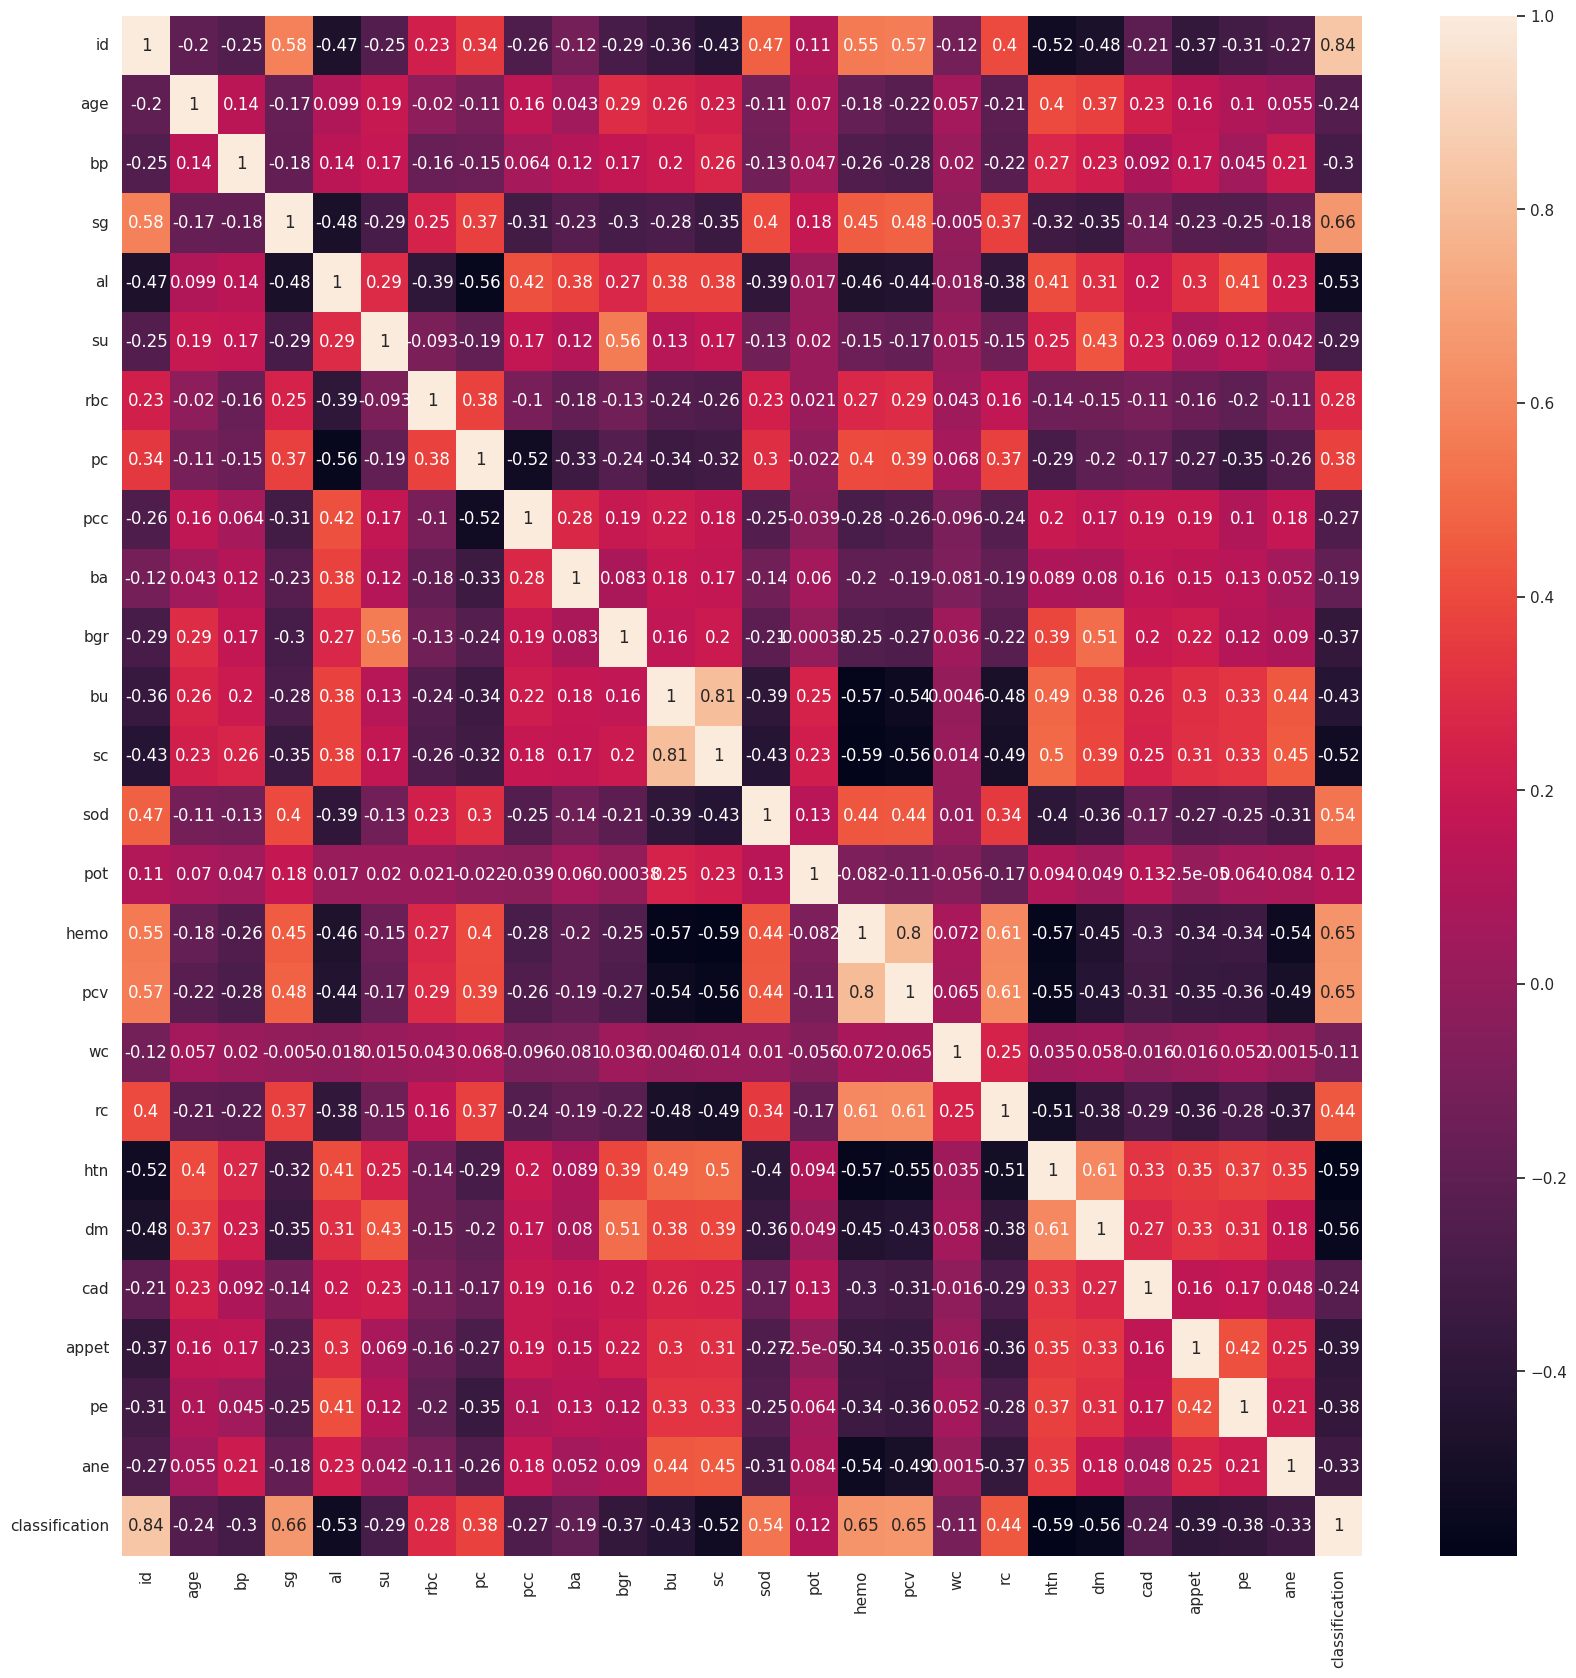

In [31]:
#finding the correlations

plt.figure(figsize=(20,20))
correlations = df_encode.corr() #using the pearson correlation method; correlation between a dependent and an independent variable is not a problem, however correlation between two independent variables is not something desired!
sns.heatmap(correlations, annot=True)

(The lighter the color the more the correlation between the variables)

#**Sampling and Scaling**

In [21]:
#separating the independent and dependent variables

#dropping the id column as it is not significant to our model
x= df_encode.drop(["id", "classification"], axis=1)

y = df_encode["classification"]

In [24]:
!pip install -U imbalanced-learn

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [23]:
#balancing the labels

ROS = RandomOverSampler()

x_ROS, y_ROS = ROS.fit_resample(x, y)
print(Counter(y_ROS))
print(y_ROS)

Counter({0: 250, 1: 250})
0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int64


In [24]:
#initializing a MinMaxScaler and scale the featuresto between -1 and 1 to normalize
#MinMaxScaler transforms features by scaling them into a given range
#scaling the features between -1 and 1

scaler = MinMaxScaler((-1, 1))
x=scaler.fit_transform(x_ROS)
y=y_ROS
print(x)

[[ 0.06666667 -0.33333333  0.5        ... -1.         -1.
  -1.        ]
 [-0.86666667 -1.          0.5        ... -1.         -1.
  -1.        ]
 [ 0.44       -0.33333333 -0.5        ...  1.         -1.
   1.        ]
 ...
 [ 0.04       -0.77777778  0.5        ... -1.         -1.
  -1.        ]
 [ 0.33333333 -0.33333333  1.         ... -1.         -1.
  -1.        ]
 [ 0.46666667 -0.55555556  0.5        ... -1.         -1.
  -1.        ]]


#**Training the model (Principal Component Analysis)**

In [25]:
#applying the PCA; PCA is all about dimensionality reduction
#number of components parameter = 0.95
#this means that scikit-learn chooses the minimum number of principal components such that 95% of the variance is retained

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tools
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)

(500, 24)
(500, 18)


This implies that 18 columns are required to maintain 95% of the variance.

In [26]:
#splitting the dataset into data for training and data for testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)



#**Creating the neural network**

In [27]:
import keras

In [28]:
#importing all the necessary dependencies
#importing a sequential model
from keras.models import Sequential

#importing a dense layer: a densely connected neural network layer
from keras.layers import Dense

#importing a dropout layer that randomly sets inputs to 0 with a frequency of rate at each step of the training time
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

#optimizers are algorithms/methods used to change the attributes of the neural network such as weights and learning rates
from keras.optimizers import Adam
from sklearn.model_selection import KFold


In [29]:
#creating the model
def model():
  classifier = Sequential()
  classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu')) #ReLu is the activation function
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15, activation = 'relu' )) #Relu = Rectified linear activation function
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1, activation = 'sigmoid')) #sigmoid is used as it exists in between 0 and 1 (binary classification)
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier


In [30]:
model = model()
model.summary() #displays model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, verbose = 1) #verbose must be set to 1 to show the porgess in every outcome

Epoch 1/10
13/13 [==============================] - 2s 43ms/step - loss: 0.7560 - accuracy: 0.4200 - val_loss: 0.7035 - val_accuracy: 0.5300
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.7105 - accuracy: 0.5250 - val_loss: 0.6612 - val_accuracy: 0.6100
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6025 - val_loss: 0.6194 - val_accuracy: 0.7700
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6353 - accuracy: 0.6450 - val_loss: 0.5826 - val_accuracy: 0.8600
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6010 - accuracy: 0.6875 - val_loss: 0.5452 - val_accuracy: 0.9000
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7700 - val_loss: 0.5087 - val_accuracy: 0.9200
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7950 - val_loss: 0.4726 - val_accuracy: 0.9300
Epoch 8/10
13/13 [=

We notice that the accuracy and the validation accuracy are both increasing and at the same time, the validation loss is decreasing.

#**Visualizing the accuracy of the model**

In [43]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix


#function to find the roc curve
def plot_auc(t_y, p_y):
  fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
  fig, c_ax = plt.subplots(1,1, figsize=(5,5))
  c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % ('classification', auc(fpr, tpr)))
  c_ax.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False positive rate')
  c_ax.set_ylabel('True positive rate')


#function to plot the precision recall curve
def plot_precision_recall_curve_helper(t_y, p_y):
  fig, c_ax= plt.subplots(1,1, figsize = (5,5))
  precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
  aps = average_precision_score(t_y, p_y)
  c_ax.plot(recall, precision, label = '%s (AP Score: %0.2f)' % ('classification', aps))
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')

#function to plot the history
def plot_history(history):
  f = plt.figure()
  f.set_figwidth(15)

  f.add_subplot(1, 2, 1)
  plt.plot(history.history['val_loss'], label = 'val loss')
  plt.plot(history.history['loss'], label = 'train loss')
  plt.legend()
  plt.title("Model loss")

  f.add_subplot(1, 2, 2)
  plt.plot(history.history['val_accuracy'], label = 'val accuracy')
  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.legend()
  plt.title("Model Accuracy")

  plt.show()

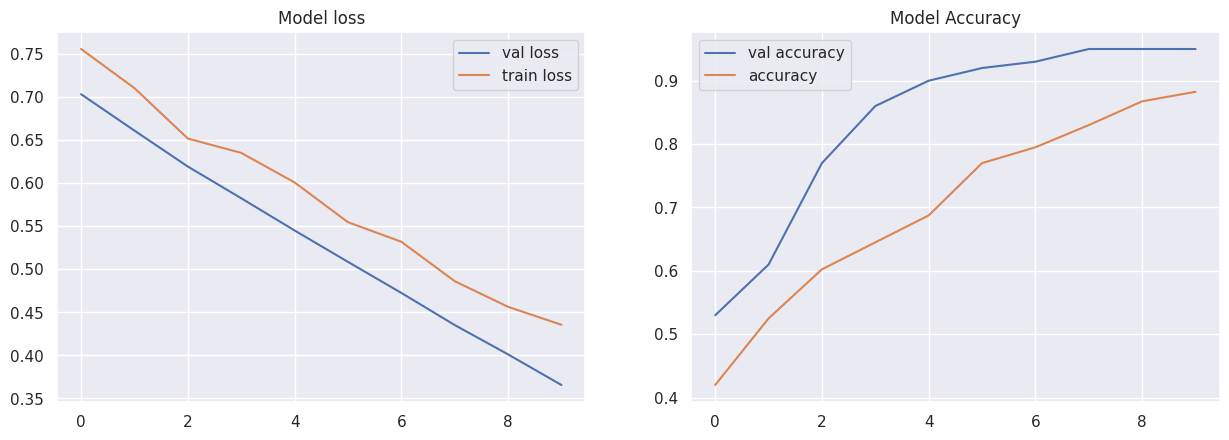

In [44]:
hist = plot_history(history)

We can observe that both training and the validation accuracy are both increasing. We also notice that both training and validation loss are decreasing.

4/4 [==============================] - 0s 5ms/step


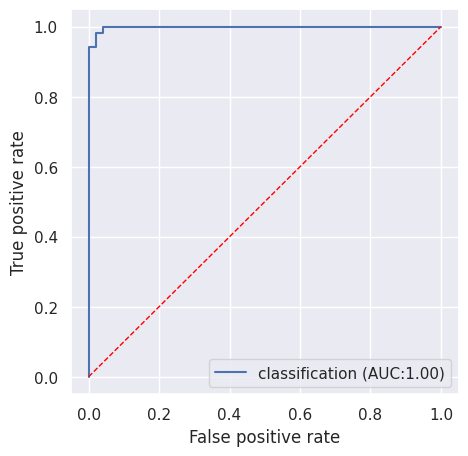

In [45]:
#plotting the roc curve
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 [==============================] - 0s 6ms/step


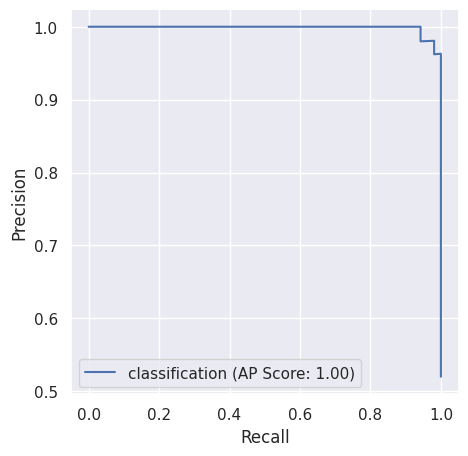

In [46]:
#plotting the precision recall curve
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [67]:
#calculating the threshold that would optimize the model's performance
#using that threshold to make the binary classification

def calc_f1(prec, recall):
  return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, threshold = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
f1score = [calc_f1(precision[i], recall[i]) for i in range(len(threshold))]
idx = np.argmax(f1score)
threshold[idx]
print('-------------------------------------------------------------------------')
print('Precision:'+str(precision[idx]))
print('Recall:'+str(recall[idx]))
print('Threshold:'+str(threshold[idx])) #threshold is a scalar hence it can be printed directly without accessing the index
print('F1 Score:'+str(f1score[idx]))


4/4 [==============================] - 0s 5ms/step
-------------------------------------------------------------------------
Precision:0.9629629629629629
Recall:1.0
Threshold:0.59646595
F1 Score:0.9811320754716981


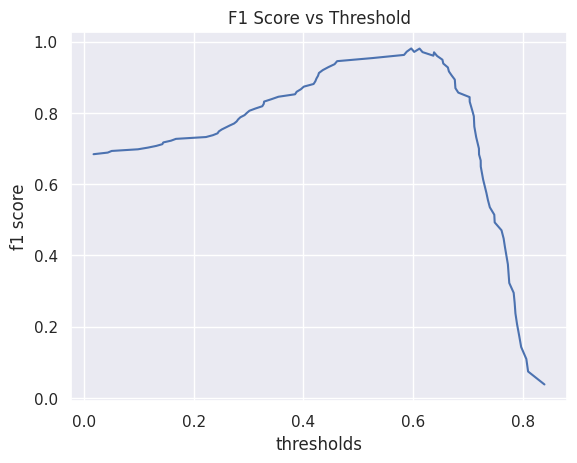

In [69]:
#plotting F1 Score vs Threshold
plt.figure()
plt.plot(threshold, f1score)
plt.title("F1 Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("f1 score")
plt.show()